# Plotting a coordinate grid

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/grid_plotting.html

This example demonstrates how you can draw a grid of solar coordinates on top
of a map.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u

import sunpy.data.sample
import sunpy.map

Let's start with a sample AIA image.

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

Now we can plot the image, and add grids in heliographic Stonyhurst and
heliographic Carrington coordinates.

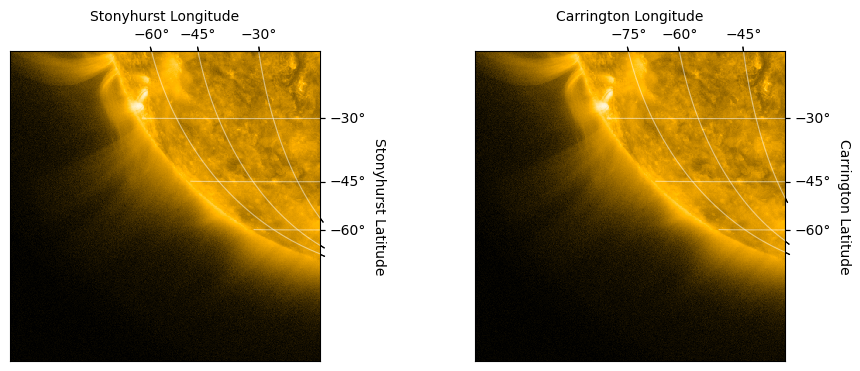

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection=aia_map)
aia_map.plot(axes=ax1, clip_interval=(1, 99.9)*u.percent)
stonyhurst_grid = aia_map.draw_grid(axes=ax1, system='stonyhurst')

ax2 = fig.add_subplot(122, projection=aia_map)
aia_map.plot(axes=ax2, clip_interval=(1, 99.9)*u.percent)
carrington_grid = aia_map.draw_grid(axes=ax2, system='carrington')

for ax in [ax1, ax2]:
    ax.set_title('')
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    # Turn of the map grid and ticks
    ax.grid(False)
    for coord in [0, 1]:
        ax.coords[coord].set_ticklabel_visible(False)
        ax.coords[coord].set_ticks_visible(False)

stonyhurst_grid['lon'].set_ticks([-30, -45, -60] * u.deg)
carrington_grid['lon'].set_ticks([-45, -60, -75] * u.deg)

fig.subplots_adjust(wspace=0.5)

plt.show()